# VIEWS v/s COPY

In [1]:
import pandas as pd
pokemon_df = pd.read_csv("~/Pandas/Data Set/pokemon.csv",usecols=["Pokemon"])
pokemon_series = pokemon_df.squeeze("columns")

In [2]:
pokemon_series[0] = "Piyush"
pokemon_series.head(1)

0    Piyush
Name: Pokemon, dtype: object

In [3]:
pokemon_df

,Pokemon
0,Piyush
1,Ivysaur
2,Venusaur
3,Charmander
4,Charmeleon
...,...
716,Yveltal
717,Zygarde
718,Diancie
719,Hoopa


# NOTE pokemon_df dataframe is also modified. 

1. Thats because Pandas has not created a seperate copy of pokemon_df and named it as pokemon_series. Infact pokemon_series is just a perspective or view of the original pokemon_df dataframe. 

2. eg if we stand in front of a door and paint it red then in our view we have only the door that is painted but in reality that door is part of a larger house and as a sresult the house is also getting modified.

3. Thus operation on series is going to have impact on dataframe. To avoid this --> We will create a seperate copy of the original dataframe.

To avoid this we will create a seperate copy of the original dataframe using
# COPY Method

In [4]:
pokemon_df = pd.read_csv("~/Pandas/Data Set/pokemon.csv",usecols=["Pokemon"])
pokemon_series = pokemon_df.squeeze("columns").copy()

In [5]:
pokemon_series[0] = "Piyush"
pokemon_series.head(3)

0      Piyush
1     Ivysaur
2    Venusaur
Name: Pokemon, dtype: object

In [6]:
pokemon_df.head(3)

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur


# Inplace Parameter

In [7]:
google = (
    pd.read_csv("~/Pandas/Data Set/google_stock_price.csv", usecols=["Stock Price"])
    .squeeze("columns")
    .copy()
    )
google

0        50.12
1        54.10
2        54.65
3        52.38
4        52.95
         ...  
3007    772.88
3008    771.07
3009    773.18
3010    771.61
3011    782.22
Name: Stock Price, Length: 3012, dtype: float64

In [8]:
google = google.sort_values()
google.head()

11    49.95
9     50.07
0     50.12
10    50.70
12    50.74
Name: Stock Price, dtype: float64

In [9]:
# This one way of changing original series
# Another way is by using original series using inplace parameter
# This will overwrite the original series

google = (
    pd.read_csv("~/Pandas/Data Set/google_stock_price.csv", usecols=["Stock Price"])
    .squeeze("columns")
    .copy()
    )
google

0        50.12
1        54.10
2        54.65
3        52.38
4        52.95
         ...  
3007    772.88
3008    771.07
3009    773.18
3010    771.61
3011    782.22
Name: Stock Price, Length: 3012, dtype: float64

In [10]:
google.sort_values(inplace=True)
google

11       49.95
9        50.07
0        50.12
10       50.70
12       50.74
         ...  
3010    771.61
3007    772.88
3009    773.18
2859    776.60
3011    782.22
Name: Stock Price, Length: 3012, dtype: float64

# MATH Methods on Series Object

In [11]:
google = (
    pd.read_csv("~/Pandas/Data Set/google_stock_price.csv", usecols=["Stock Price"])
    .squeeze("columns")
)
google.head()

0    50.12
1    54.10
2    54.65
3    52.38
4    52.95
Name: Stock Price, dtype: float64

In [12]:
google.count()

3012

In [13]:
google.product()
google.sum()
google.mean()
google.min()
google.max()
google.median()
google.mode()

0    291.21
Name: Stock Price, dtype: float64

In [14]:
google.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3007    False
3008    False
3009    False
3010    False
3011    False
Name: Stock Price, Length: 3012, dtype: bool

In [15]:
google.isna().sum()

0

In [16]:
google.describe()

count    3012.000000
mean      334.310093
std       173.187205
min        49.950000
25%       218.045000
50%       283.315000
75%       443.000000
max       782.220000
Name: Stock Price, dtype: float64

In [17]:
google.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3012 entries, 0 to 3011
Series name: Stock Price
Non-Null Count  Dtype  
--------------  -----  
3012 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


# BROADCASTING
Applying consistent maths operations to all values in a series

In [18]:
# Add
google = pd.read_csv("~/Pandas/Data Set/google_stock_price.csv", usecols=["Stock Price"]).squeeze("columns")
google.head()

0    50.12
1    54.10
2    54.65
3    52.38
4    52.95
Name: Stock Price, dtype: float64

In [19]:
# Operations dont affect original series
google + 10
google -20
google * 2
google/2

# Another way using methods
google.add(10)

0        60.12
1        64.10
2        64.65
3        62.38
4        62.95
         ...  
3007    782.88
3008    781.07
3009    783.18
3010    781.61
3011    792.22
Name: Stock Price, Length: 3012, dtype: float64

# value_counts Method

In [20]:
pokemon = pd.read_csv("~/Pandas/Data Set/pokemon.csv", index_col=["Pokemon"]).squeeze("columns")
pokemon.head()

Pokemon
Bulbasaur     Grass
Ivysaur       Grass
Venusaur      Grass
Charmander     Fire
Charmeleon     Fire
Name: Type, dtype: object

In [21]:
# Top 5 pokemons by type
pokemon.value_counts(ascending=False).head(5)

Water     105
Normal     93
Grass      66
Bug        63
Fire       47
Name: Type, dtype: int64

In [22]:
# To get count in order in which they appear in the series
# eg At Index 0 Bulbasaur Type was Grass
pokemon.value_counts(sort = False)

Grass        66
Fire         47
Water       105
Bug          63
Normal       93
Poison       28
Electric     36
Ground       30
Fairy        17
Fighting     25
Psychic      47
Rock         41
Ghost        23
Ice          23
Dragon       24
Dark         28
Steel        22
Flying        3
Name: Type, dtype: int64

In [23]:
# To get percentages
pokemon.value_counts(normalize=True)*100

Water       14.563107
Normal      12.898752
Grass        9.153953
Bug          8.737864
Fire         6.518724
Psychic      6.518724
Rock         5.686546
Electric     4.993065
Ground       4.160888
Poison       3.883495
Dark         3.883495
Fighting     3.467406
Dragon       3.328710
Ghost        3.190014
Ice          3.190014
Steel        3.051318
Fairy        2.357836
Flying       0.416089
Name: Type, dtype: float64

In [24]:
# Top 3 pokemon types by percentages
pokemon.value_counts(ascending=False, normalize=True).head(3)*100

Water     14.563107
Normal    12.898752
Grass      9.153953
Name: Type, dtype: float64

 NOTE : Case Sensitivity matters.  Water, water[space bar] and water are 2 different types

# APPLY Method
- To invoke a function on every single value in series

- This function will not be vectorized (converted to C code), so it’s not as efficient as native functions 

In [25]:
pokemon = pd.read_csv("~/Pandas/Data Set/pokemon.csv", index_col=["Pokemon"]).squeeze("columns")
pokemon.apply(len)

Pokemon
Bulbasaur     5
Ivysaur       5
Venusaur      5
Charmander    4
Charmeleon    4
             ..
Yveltal       4
Zygarde       6
Diancie       4
Hoopa         7
Volcanion     4
Name: Type, Length: 721, dtype: int64

In [26]:
def rank_pokemon(pokemon_type):
    if pokemon_type in ["Fire", "Grass", "Water"]:
        return "Classic"
    elif pokemon_type == "Normal":
        return "Boring"
    else:
        return "TBD"


pokemon.apply(rank_pokemon).head(18)


Pokemon
Bulbasaur     Classic
Ivysaur       Classic
Venusaur      Classic
Charmander    Classic
Charmeleon    Classic
Charizard     Classic
Squirtle      Classic
Wartortle     Classic
Blastoise     Classic
Caterpie          TBD
Metapod           TBD
Butterfree        TBD
Weedle            TBD
Kakuna            TBD
Beedrill          TBD
Pidgey         Boring
Pidgeotto      Boring
Pidgeot        Boring
Name: Type, dtype: object

# MAP Method

To map every series value to another value

- df["new_mapped_col"] = df["col_to_be_mapped"].map(mapping_dictionary)

In [27]:
pokemon = pd.read_csv("~/Pandas/Data Set/pokemon.csv", index_col=["Pokemon"]).squeeze("columns")

In [28]:
# Creating connections using dictionary
# NaN (not a number) shows missing matching values 

mappings = {
    "Grass" : "Classic",
    "Fire" : "Classic",
    "Water" : "Classic",
    "Normal" : "Boring"
}

pokemon.map(mappings)

Pokemon
Bulbasaur     Classic
Ivysaur       Classic
Venusaur      Classic
Charmander    Classic
Charmeleon    Classic
               ...   
Yveltal           NaN
Zygarde           NaN
Diancie           NaN
Hoopa             NaN
Volcanion     Classic
Name: Type, Length: 721, dtype: object

In [29]:
# MAP Method can accept another series as input
# MAP will lookup the 'Grass' VALUE of pokemon series in the mapping series INDEX LABEL and return the corrosponding series VALUE i.e 'Classic'
mappings = {
    "Grass" : "Classic",
    "Fire" : "Classic",
    "Water" : "Classic",
    "Normal" : "Boring"
}
map_series = pd.Series(mappings)
pokemon.map(map_series)


Pokemon
Bulbasaur     Classic
Ivysaur       Classic
Venusaur      Classic
Charmander    Classic
Charmeleon    Classic
               ...   
Yveltal           NaN
Zygarde           NaN
Diancie           NaN
Hoopa             NaN
Volcanion     Classic
Name: Type, Length: 721, dtype: object

NOTE
Unlike the keys in a Python dictionary, the index labels in a pandas Series can contain duplicates.


# WHERE Method

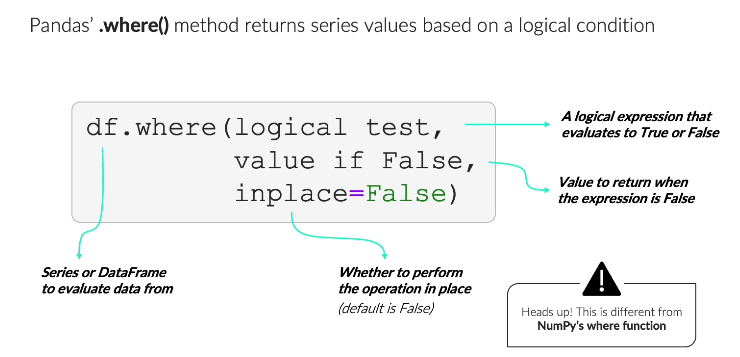

1. when true it retains the original value

2. Use ~ before condition to retain when false and return expression when true

3. chaining where clause .where(condition1, return value when false ).where(condition2, return value2 when false)

NOTE : NumPy’s where function is often more convenient & useful than Pandas’ method

# NUMPY's Select Method

- NumPy’s select() function lets you create columns based on multiple conditions. This is more flexible than NumPy’s where() function or Pandas’ .where() method


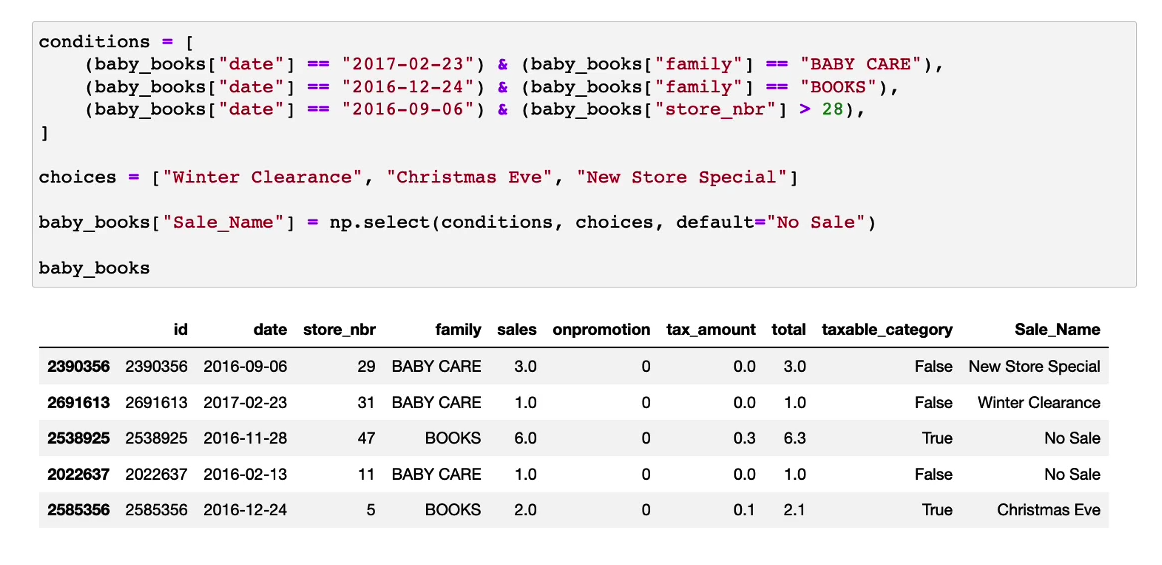

In [31]:
import pandas as pd
import numpy as np

oil = pd.read_csv("/home/picassa240/Maven Pandas Numpy/Pandas Course Resources/retail/oil.csv")
oil.head()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [33]:
oil.columns = ['date', 'price']
oil.head(3)

,date,price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


In [35]:
oil["buy"] = np.where(oil["price"] > 100 , "Too High", "Buy")
oil

,date,price,buy
0,2013-01-01,NaN,Buy
1,2013-01-02,93.14,Buy
2,2013-01-03,92.97,Buy
3,2013-01-04,93.12,Buy
4,2013-01-07,93.20,Buy
...,...,...,...
1213,2017-08-25,47.65,Buy
1214,2017-08-28,46.40,Buy
1215,2017-08-29,46.46,Buy
1216,2017-08-30,45.96,Buy


In [36]:
# To create more categories we need to write nested where clauses which is not the best way

In [39]:
conditions = [
    (oil["price"] > 100),
    (oil["price"] <= 100) & (oil["price"] >50),
    (oil["price"] < 50 )
]

choices = ["Dont Buy", "Buy", "Strong Buy"]

oil["buy"] = np.select(conditions, choices, default = "missing")
oil

,date,price,buy
0,2013-01-01,NaN,missing
1,2013-01-02,93.14,Buy
2,2013-01-03,92.97,Buy
3,2013-01-04,93.12,Buy
4,2013-01-07,93.20,Buy
...,...,...,...
1213,2017-08-25,47.65,Strong Buy
1214,2017-08-28,46.40,Strong Buy
1215,2017-08-29,46.46,Strong Buy
1216,2017-08-30,45.96,Strong Buy


In [40]:
oil["buy"].value_counts()

Buy           512
Strong Buy    481
Dont Buy      182
missing        43
Name: buy, dtype: int64